Ирисы Фишера — это набор данных для иллюстрации алгоритмов задач классификации.
Набор Фишера состоит из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов: 
Ирис щетинистый (Iris setosa),
Ирис виргинский (Iris virginica),
Ирис разноцветный (Iris versicolor).
Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):
Длина наружной доли околоцветника (англ. sepal length);
Ширина наружной доли околоцветника (англ. sepal width);
Длина внутренней доли околоцветника (англ. petal length);
Ширина внутренней доли околоцветника (англ. petal width).
На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений.
Классификацию проводим методом K-ближайших соседей.

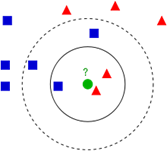

Пример классификации k-ближайших соседей. Тестовый образец (зелёный круг) должен быть классифицирован как синий квадрат (класс 1) или как красный треугольник (класс 2). Если k = 3 (три соседа), то он классифицируется как 2-й класс, потому что внутри меньшего круга 2 треугольника и только 1 квадрат. Если k = 5 (пять соседей), то он будет классифицирован как 1-й класс (3 квадрата против 2 треугольников внутри большего круга)

https://ru.wikipedia.org/wiki/Метод_k-ближайших_соседей

Набор данных ирисы Фишера по умолчанию присутствует в библиотеке sklearn и первая строка программы его вызывает.
Данный набор делим на две выборки - обучающую и тестовую. На первой проводим обучение модели, на второй сравниваем предсказания модели с реальными данными.
Разделение выполняет вторая строка программы.

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Данные в наборе упорядочены по видам. Сначала мы превращаем их в случайный набор данных.

In [4]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]


Теперь нам нужно разделить данные на обучение и тестирование.
Это распространенный метод в машинном обучении, и scikit-learn имеет встроенную функцию для разделения данных
на обучение и тестирование. В данном случае мы используем 50% данных в качестве обучения и 50% тестирования. 
80% и 20% - это еще одно распространенное соотношение. 

In [5]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
[0 1 1 2 2 2 0 2 2 1 1 2 2 1 1 1 1 1 0 2 2 2 1 0 2 1 1 2 1 0 2 2 0 2 2 0 2
 1 0 2 0 2 2 2 0 2 0 0 1 0 1 0 2 1 1 0 1 2 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 2]
[1 0 1 2 2 1 1 0 1 0 0 2 2 2 1 0 2 0 2 1 0 0 0 2 1 1 1 1 1 0 2 2 2 2 0 1 0
 1 2 1 2 2 1 2 2 1 0 2 0 2 1 2 0 0 2 0 2 1 2 1 0 1 0 1 0 2 2 0 0 0 1 0 1 0
 1]


In [7]:
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)
print("Доля правильных предсказаний")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Доля правильных предсказаний
0.96


Сначала выводим правильные и неправидьные предсказания.

In [8]:
import numpy as np
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73 74]
[24 38 72]


###### Теперь строим диаграмму рассеяния

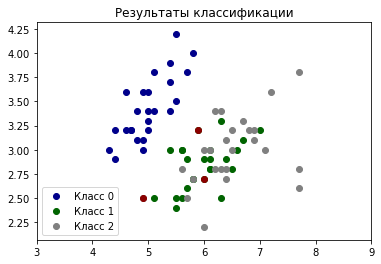

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = ["darkblue", "darkgreen", "gray"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 0], test_X[idx, 1], color=color, label="Класс %s" % str(n))
plt.scatter(test_X[incorrect_idx, 0], test_X[incorrect_idx, 1], color="darkred")
plt.xlim(3, 9)
plt.legend(loc=3)
plt.title("Результаты классификации")
plt.show()

Мы видим, что ошибки (красные точки) возникают в области, где зеленые точки (класс 1) и серые точки (класс 2) смешиваются. Это дает нам представление о том, какие функции следует добавить - любая функция, которая помогает разделить класс 1 и класс 2, должна улучшить предсказания классификатора.